In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# use citipy module to determine city based on lat/long
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
#Importing the requests library. 
import requests

#Importing the API key. 
from config import weather_api_key

#Importing the datetime module form the datetime library
from datetime import datetime

In [7]:
# URL for Open Weather API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# make empty list to hold weather data
city_data = []

#Print the beginning of the logging. 
print('Beginning Data Retrieval     ')
print('-----------------------------')

#Create counters. 
record_count = 1 
set_count = 1

#Looping through all the cities in our list. 

for i,city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city. 
    city_url = url + '&q=' + city.replace(' ','+')

    #Log the URL, record, and set numbers and the city. 
    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    #Add 1 to the record count. 
    record_count += 1

    #Run an API 

    try:
        #Parse the JSON and retrieve data. 
        city_weather = requests.get(city_url).json()
        #Parse out the needed data. 
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard. 
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into the city_data list. 
        city_data.append({"City": city.title(),
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp, 
                        "Humidity": city_humidity, 
                        "Cloudiness": city_clouds, 
                        "Wind Speed": city_wind,
                        "Country": city_country, 
                        "Date": city_date})
        #If an error is experienced, skip the city
    except:
        print('City not found. Skipping...')
        pass

#Indicate the Data loading is complete
print('---------------------------')
print('Data Retrieval Complete    ')
print('---------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | brigantine
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | nara
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | tomatlan
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | harer
Processing Record 11 of Set 1 | luau
Processing Record 12 of Set 1 | sabha
Processing Record 13 of Set 1 | hobyo
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | kamenka
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | oranjestad
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | abonnema


Processing Record 41 of Set 4 | north bend
Processing Record 42 of Set 4 | houma
Processing Record 43 of Set 4 | russell
Processing Record 44 of Set 4 | miri
Processing Record 45 of Set 4 | saldanha
Processing Record 46 of Set 4 | tianpeng
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | kelamangalam
Processing Record 49 of Set 4 | taoudenni
Processing Record 50 of Set 4 | alexandria
Processing Record 1 of Set 5 | dzhebariki-khaya
Processing Record 2 of Set 5 | samarai
Processing Record 3 of Set 5 | razole
Processing Record 4 of Set 5 | matagami
Processing Record 5 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 5 | nome
Processing Record 7 of Set 5 | dobryatino
Processing Record 8 of Set 5 | paita
Processing Record 9 of Set 5 | kahului
Processing Record 10 of Set 5 | lata
Processing Record 11 of Set 5 | castro
Processing Record 12 of Set 5 | aykhal
Processing Record 13 of Set 5 | vila franca do campo
Processing Record 14 of Set 

Processing Record 28 of Set 8 | khandyga
Processing Record 29 of Set 8 | prince rupert
Processing Record 30 of Set 8 | tarko-sale
Processing Record 31 of Set 8 | dingle
Processing Record 32 of Set 8 | sault sainte marie
Processing Record 33 of Set 8 | lixourion
Processing Record 34 of Set 8 | pechenga
Processing Record 35 of Set 8 | saurimo
Processing Record 36 of Set 8 | sola
Processing Record 37 of Set 8 | key biscayne
Processing Record 38 of Set 8 | namibe
Processing Record 39 of Set 8 | cabedelo
Processing Record 40 of Set 8 | bilma
Processing Record 41 of Set 8 | zarubino
Processing Record 42 of Set 8 | mgandu
Processing Record 43 of Set 8 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 44 of Set 8 | sorsk
Processing Record 45 of Set 8 | mao
Processing Record 46 of Set 8 | zvishavane
Processing Record 47 of Set 8 | hualmay
Processing Record 48 of Set 8 | gravdal
Processing Record 49 of Set 8 | thinadhoo
Processing Record 50 of Set 8 | mogadishu
Processing Record 

City not found. Skipping...
Processing Record 19 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 20 of Set 12 | soyo
Processing Record 21 of Set 12 | maesteg
Processing Record 22 of Set 12 | odweyne
Processing Record 23 of Set 12 | kyren
Processing Record 24 of Set 12 | evensk
Processing Record 25 of Set 12 | ossora
Processing Record 26 of Set 12 | antsohihy
Processing Record 27 of Set 12 | olga
Processing Record 28 of Set 12 | kachikau
City not found. Skipping...
Processing Record 29 of Set 12 | maldonado
Processing Record 30 of Set 12 | corumba
Processing Record 31 of Set 12 | ostersund
Processing Record 32 of Set 12 | kismayo
Processing Record 33 of Set 12 | tanete
Processing Record 34 of Set 12 | rafai
Processing Record 35 of Set 12 | richards bay
Processing Record 36 of Set 12 | sandakan
Processing Record 37 of Set 12 | maryville
Processing Record 38 of Set 12 | am timan
Processing Record 39 of Set 12 | buraydah
Processing Record 40 of Set 12 | novouzensk
Pro

In [9]:
#Convert array of dictionaries to pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Brigantine,39.4101,-74.3646,76.01,89,1,12.12,US,2021-06-07 04:07:10
1,Nara,34.6851,135.8049,85.91,41,99,6.55,JP,2021-06-07 04:04:42
2,Albany,42.6001,-73.9662,72.16,78,15,3.76,US,2021-06-07 04:06:58
3,Ushuaia,-54.8000,-68.3000,34.02,92,97,7.05,AR,2021-06-07 04:02:16
4,Vaini,-21.2000,-175.2000,71.76,100,90,5.75,TO,2021-06-07 04:07:11
5,Bathsheba,13.2167,-59.5167,81.21,65,40,19.46,BB,2021-06-07 04:07:11
6,Tomatlan,19.9333,-105.2500,78.49,71,75,1.72,MX,2021-06-07 04:07:11
7,Puerto Ayora,-0.7393,-90.3518,72.55,98,24,9.19,EC,2021-06-07 04:07:12
8,Harer,9.3094,42.1258,60.30,82,7,3.96,ET,2021-06-07 04:07:12
9,Luau,-10.7073,22.2247,53.76,74,76,4.23,AO,2021-06-07 04:07:12


In [10]:
#Create output file
output_data_file = 'weather_data/cities.csv'

#Exporint the City_Data into a CSV. 

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [11]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

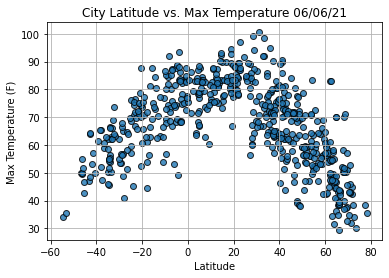

In [12]:
#Import time module
import time
#Build scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#Add additional scatter plot formats

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save scatter plot
plt.savefig('weather_data/Fig1.png')

#Show scatter plot
plt.show()

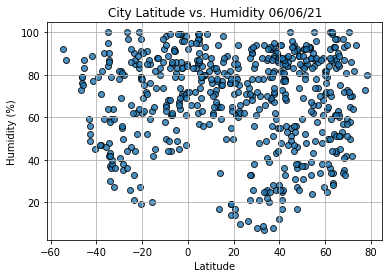

In [13]:
#Generate scatter plots for lat vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8,label='Cities')

#Add additional scatter plot formats 
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save scatter plot
plt.savefig('weather_data/Fig2.png')

#Show scatter plot
plt.show()

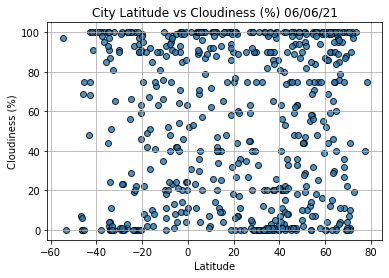

In [14]:
#Generate scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#Add additional scatter plot formats 
plt.title(f'City Latitude vs Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save
plt.savefig('weather_data/Fig3.png')

#Show
plt.show()

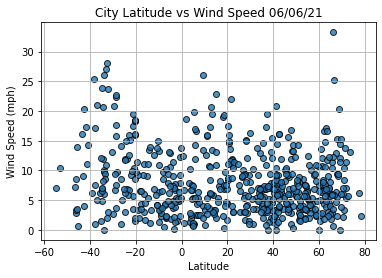

In [15]:
#Generate scatter plots for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label = 'Cities')

#Add additional scatter plot formats

plt.title(f'City Latitude vs Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save
plt.savefig('weather_data/Fig4.png')

#Show
plt.show()

In [16]:
#Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
    #Calculate the regression line 'y_values' from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    #Get equation of the line.
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    
    #Add scatter plot/plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,'r')
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='red')
    plt.xlabel('latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                      Kamenka
Lat                       51.3223
Lng                       42.7678
Max Temp                    59.76
Humidity                       84
Cloudiness                     95
Wind Speed                   3.65
Country                        RU
Date          2021-06-07 04:07:14
Name: 13, dtype: object

In [18]:
city_data_df['Lat'] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
569    False
570     True
571     True
572    False
573     True
Name: Lat, Length: 574, dtype: bool

In [19]:
# Create northern/southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

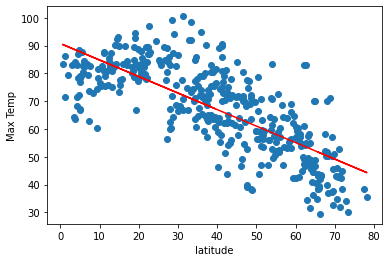

In [20]:
#Linear regression on the Northern Hemisphere (max temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,20))

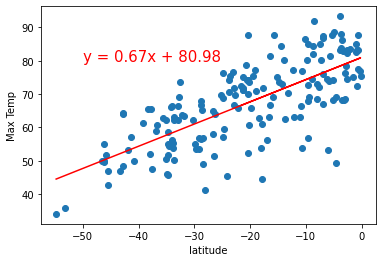

In [21]:
#Linear regression on the Southern Hemisphere (max temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

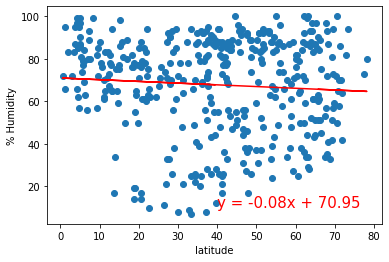

In [22]:
# Linear regression on the Northern Hemisphere (humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

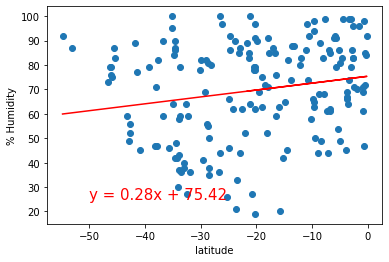

In [23]:
#Linear regression on the Southern Hemisphere (humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,25))

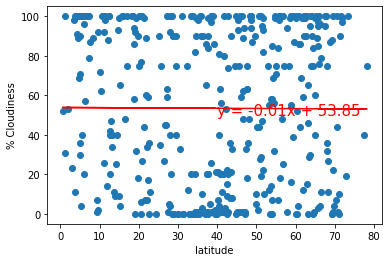

In [24]:
#Linear regression on the Northern Hemisphere (cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,50))

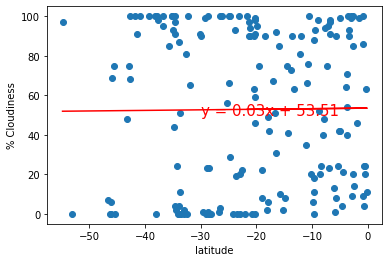

In [25]:
# Linear regression on the Southern Hemisphere (cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-30,50))

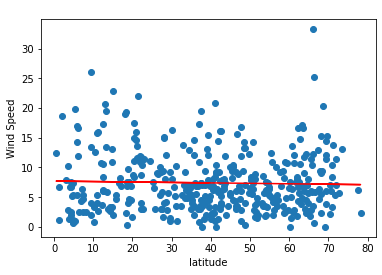

In [26]:
# Linear regression on the Northern Hemisphere (wind speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

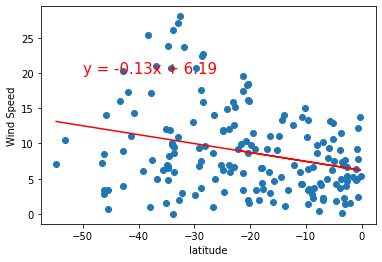

In [27]:
#Linear regression on the Southern Hemisphere (wind speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))